<a href="https://colab.research.google.com/github/pentakll4002/simpleLinear/blob/main/Polynomial_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Y dataset')

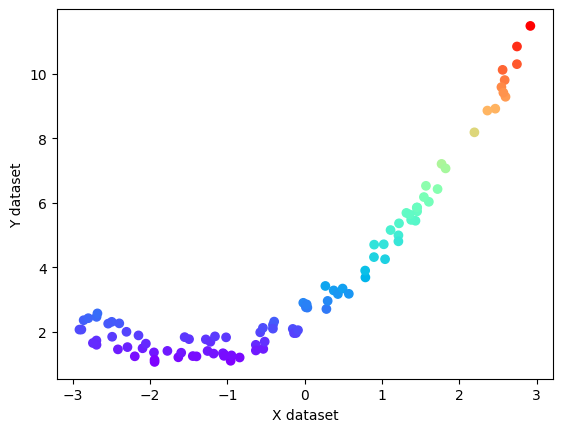

In [ ]:
X = 6 * np.random.rand(100, 1) - 3                          # X từ -3 đến 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100, 1)       # y theo hàm bậc hai
# Hệ số: y = 0.5 * X^2 + 1.5 * X + 2 + outliers

plt.scatter(X, y, c=y, cmap='rainbow')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [ ]:
### Train Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [ ]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.7064204086381822


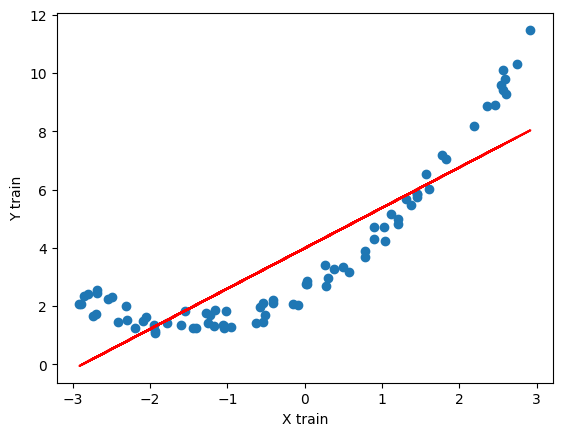

In [ ]:
### Lets visualize this model
plt.plot(X_train, regression_1.predict(X_train), color='red')
plt.scatter(X_train, y_train)
plt.xlabel('X train')
plt.ylabel('Y train')
plt.show()

# Lets apply polynomial transformation


In [ ]:
### # Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly

array([[ 1.00000000e+00, -2.05604654e+00,  4.22732738e+00],
       [ 1.00000000e+00,  1.21195782e+00,  1.46884176e+00],
       [ 1.00000000e+00, -1.55435547e+00,  2.41602092e+00],
       [ 1.00000000e+00, -2.91575314e+00,  8.50161640e+00],
       [ 1.00000000e+00, -1.04499717e+00,  1.09201908e+00],
       [ 1.00000000e+00,  1.48139255e-02,  2.19452390e-04],
       [ 1.00000000e+00, -1.94327269e+00,  3.77630874e+00],
       [ 1.00000000e+00, -1.01817985e+00,  1.03669020e+00],
       [ 1.00000000e+00,  1.45509314e+00,  2.11729604e+00],
       [ 1.00000000e+00, -1.16192550e+00,  1.35007086e+00],
       [ 1.00000000e+00, -2.49786747e+00,  6.23934188e+00],
       [ 1.00000000e+00,  3.74728729e-01,  1.40421620e-01],
       [ 1.00000000e+00, -2.41783981e+00,  5.84594936e+00],
       [ 1.00000000e+00, -2.80136032e+00,  7.84761963e+00],
       [ 1.00000000e+00,  2.57056148e+00,  6.60778633e+00],
       [ 1.00000000e+00,  1.44975073e+00,  2.10177719e+00],
       [ 1.00000000e+00, -2.30715793e+00

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9826297996430358


In [ ]:
### He so tuong quan (Coefficient or Slope), he so chan (Intercept)
print(regression.coef_)
print(regression.intercept_)

[[ 0.          1.52662868  0.49453767 -0.00268755]]
[2.5320414]


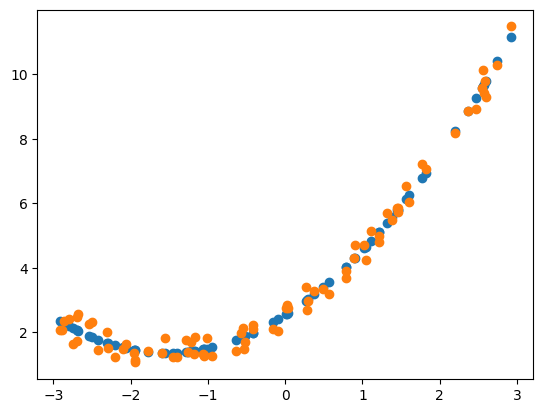

In [ ]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly

array([[ 1.00000000e+00, -2.05604654e+00,  4.22732738e+00,
        -8.69158185e+00],
       [ 1.00000000e+00,  1.21195782e+00,  1.46884176e+00,
         1.78017426e+00],
       [ 1.00000000e+00, -1.55435547e+00,  2.41602092e+00,
        -3.75535533e+00],
       [ 1.00000000e+00, -2.91575314e+00,  8.50161640e+00,
        -2.47886148e+01],
       [ 1.00000000e+00, -1.04499717e+00,  1.09201908e+00,
        -1.14115685e+00],
       [ 1.00000000e+00,  1.48139255e-02,  2.19452390e-04,
         3.25095137e-06],
       [ 1.00000000e+00, -1.94327269e+00,  3.77630874e+00,
        -7.33839763e+00],
       [ 1.00000000e+00, -1.01817985e+00,  1.03669020e+00,
        -1.05553707e+00],
       [ 1.00000000e+00,  1.45509314e+00,  2.11729604e+00,
         3.08086294e+00],
       [ 1.00000000e+00, -1.16192550e+00,  1.35007086e+00,
        -1.56868175e+00],
       [ 1.00000000e+00, -2.49786747e+00,  6.23934188e+00,
        -1.55850491e+01],
       [ 1.00000000e+00,  3.74728729e-01,  1.40421620e-01,
      

In [ ]:
### Prediction of new data set
### Dự đoán trên tập dữ liệu mới
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

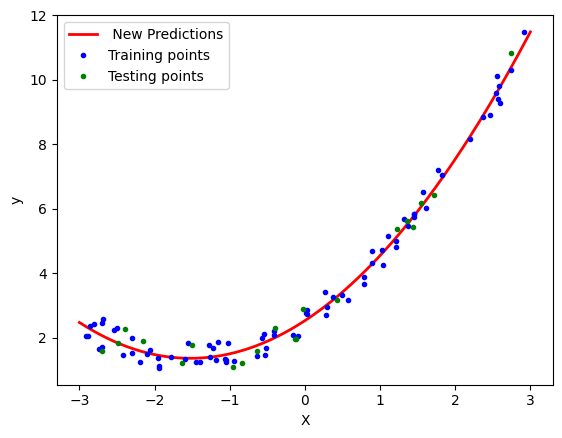

In [ ]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pineline Concepts

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


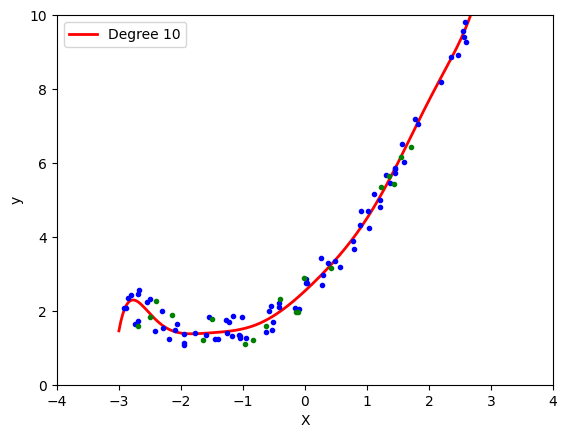

In [ ]:
poly_regression(10)